# NYC 311 Service Request Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")

C:\Users\biswadip chatterjee\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.head(10)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
5,32306554,12/31/2015 11:56:30 PM,01/01/2016 01:50:11 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,260 21 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.660823,-73.992568,"(40.66082272389114, -73.99256786342693)"
6,32306559,12/31/2015 11:55:32 PM,01/01/2016 01:53:54 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10032.0,524 WEST 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.840848,-73.937375,"(40.840847591440415, -73.9373750864581)"
7,32307009,12/31/2015 11:54:05 PM,01/01/2016 01:42:54 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10457.0,501 EAST 171 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837503,-73.902905,"(40.83750262540012, -73.90290517326568)"
8,32308581,12/31/2015 11:53:58 PM,01/01/2016 08:27:32 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11415.0,83-44 LEFFERTS BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.704977,-73.832605,"(40.704977164399935, -73.8326047502584)"
9,32308391,12/31/2015 11:53:58 PM,01/01/2016 01:17:40 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11219.0,1408 66 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.623793,-73.999539,"(40.623793065806524, -73.99953890121567)"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
Unique Key                        364558 non-null int64
Created Date                      364558 non-null object
Closed Date                       362177 non-null object
Agency                            364558 non-null object
Agency Name                       364558 non-null object
Complaint Type                    364558 non-null object
Descriptor                        358057 non-null object
Location Type                     364425 non-null object
Incident Zip                      361560 non-null float64
Incident Address                  312859 non-null object
Street Name                       312859 non-null object
Cross Street 1                    307370 non-null object
Cross Street 2                    306753 non-null object
Intersection Street 1             51120 non-null object
Intersection Street 2             50512 non-null object
Address Type                      36

In [6]:
data.shape

(364558, 53)

In [7]:
data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [8]:
data.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.645580e+05,361560.000000,3.605280e+05,360528.000000,0.0,0.0,0.0,0.0,0.0,360528.000000,360528.000000
mean,3.106595e+07,10858.496659,1.005043e+06,203425.305782,NaN,NaN,NaN,NaN,NaN,40.724980,-73.924946
std,7.331531e+05,578.263114,2.196362e+04,29842.192857,NaN,NaN,NaN,NaN,NaN,0.081907,0.079213
min,2.960737e+07,83.000000,9.133570e+05,121185.000000,NaN,NaN,NaN,NaN,NaN,40.499040,-74.254937
25%,3.049938e+07,10314.000000,9.919460e+05,182945.000000,NaN,NaN,NaN,NaN,NaN,40.668742,-73.972253
50%,3.108795e+07,11209.000000,1.003470e+06,201023.000000,NaN,NaN,NaN,NaN,NaN,40.718406,-73.930643
75%,3.167433e+07,11238.000000,1.019134e+06,222790.000000,NaN,NaN,NaN,NaN,NaN,40.778166,-73.874098
max,3.231065e+07,11697.000000,1.067186e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700715


In [3]:
#complaint type breakdown
Complaint_Type = data["Complaint Type"].value_counts()
Complaint_Type

Blocked Driveway             100881
Illegal Parking               92679
Noise - Street/Sidewalk       51692
Noise - Commercial            44109
Derelict Vehicle              21661
Noise - Vehicle               19352
Animal Abuse                  10541
Traffic                        5198
Homeless Encampment            4879
Vending                        4192
Noise - Park                   4109
Drinking                       1409
Noise - House of Worship       1070
Posting Advertisement           681
Urinating in Public             641
Bike/Roller/Skate Chronic       478
Panhandling                     327
Disorderly Youth                315
Illegal Fireworks               172
Graffiti                        157
Agency Issues                     8
Squeegee                          4
Ferry Complaint                   2
Animal in a Park                  1
Name: Complaint Type, dtype: int64

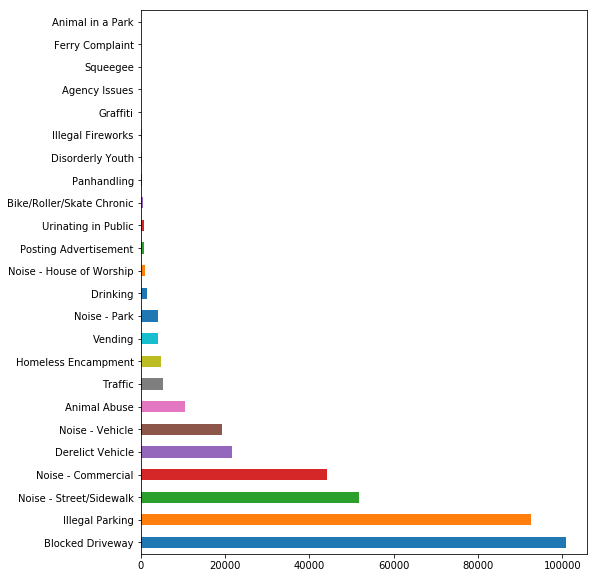

In [5]:
Complaint_Type.plot(kind='barh',figsize=(8,10))

In [ ]:
Descriptor = data['Descriptor'].value_counts()
Descriptor

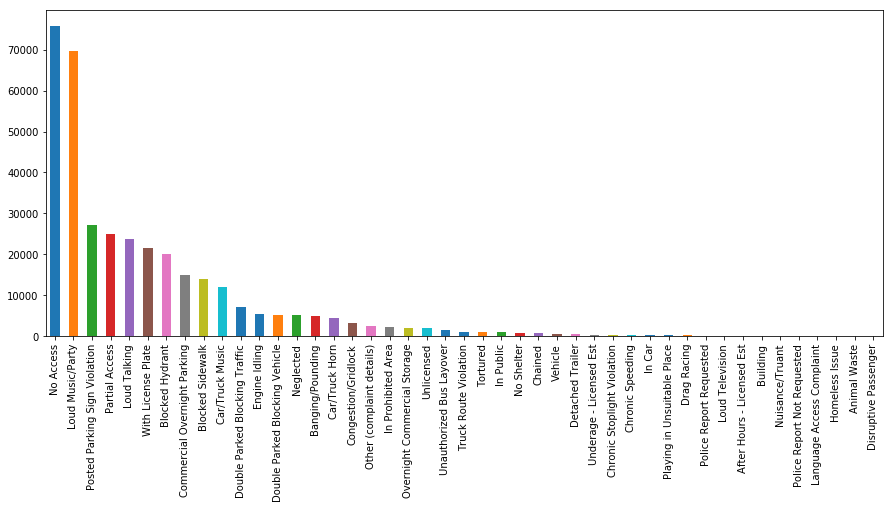

In [12]:
Descriptor.plot(kind='bar',figsize=(15,6))

In [13]:
data.groupby(['Complaint Type','Descriptor']).size().reset_index()

,Complaint Type,Descriptor,0
0,Agency Issues,Language Access Complaint,8
1,Animal Abuse,Chained,695
2,Animal Abuse,In Car,299
3,Animal Abuse,Neglected,5131
4,Animal Abuse,No Shelter,886
5,Animal Abuse,Other (complaint details),2489
6,Animal Abuse,Tortured,1041
7,Animal in a Park,Animal Waste,1
8,Blocked Driveway,No Access,75888
9,Blocked Driveway,Partial Access,24993


In [14]:
#complaint by city
City = data['City'].value_counts()
City

BROOKLYN               118862
NEW YORK                77312
BRONX                   49171
STATEN ISLAND           15340
JAMAICA                  8932
ASTORIA                  7991
FLUSHING                 7487
RIDGEWOOD                6392
CORONA                   5383
WOODSIDE                 4357
EAST ELMHURST            3558
OZONE PARK               3446
ELMHURST                 3438
SOUTH RICHMOND HILL      3431
MASPETH                  3118
WOODHAVEN                3103
LONG ISLAND CITY         3028
SOUTH OZONE PARK         2668
FRESH MEADOWS            2453
RICHMOND HILL            2335
MIDDLE VILLAGE           2291
QUEENS VILLAGE           2251
FOREST HILLS             2122
JACKSON HEIGHTS          2106
REGO PARK                1807
BAYSIDE                  1550
COLLEGE POINT            1544
FAR ROCKAWAY             1397
WHITESTONE               1369
HOLLIS                   1231
HOWARD BEACH             1144
SPRINGFIELD GARDENS      1094
ROSEDALE                 1091
SAINT ALBA

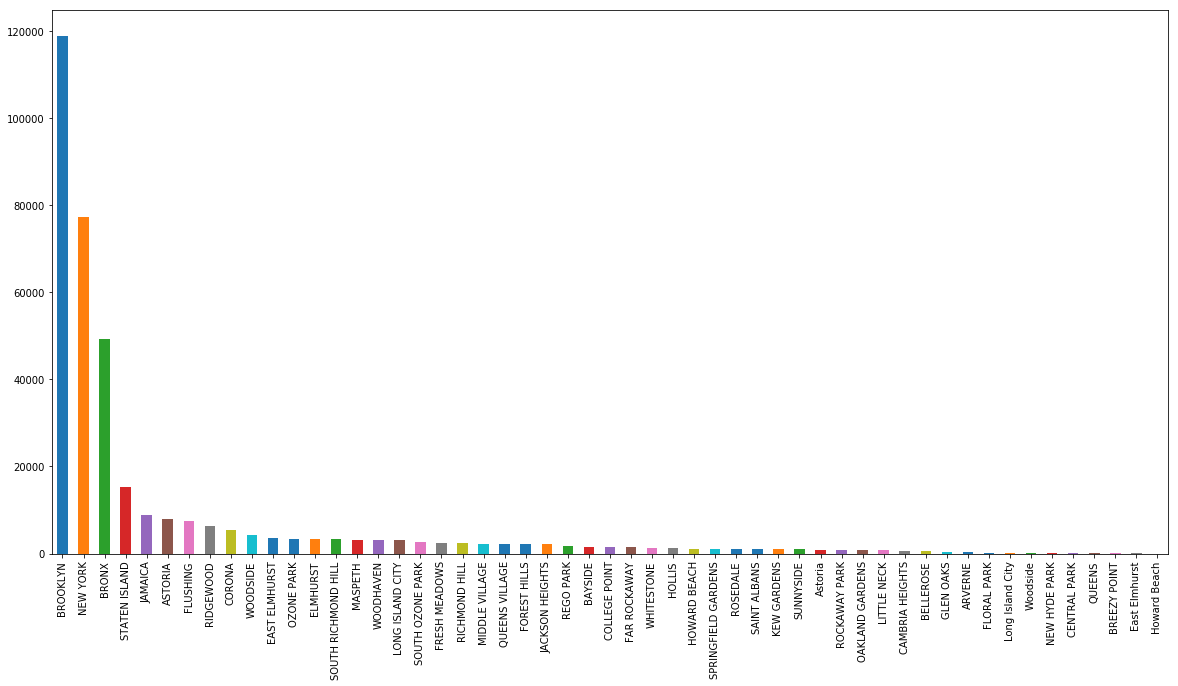

In [15]:
City.plot(kind='bar',figsize=(20,10))

In [16]:
major_complaint=Complaint_Type.nlargest(10)
major_complaint

Blocked Driveway           100881
Illegal Parking             92679
Noise - Street/Sidewalk     51692
Noise - Commercial          44109
Derelict Vehicle            21661
Noise - Vehicle             19352
Animal Abuse                10541
Traffic                      5198
Homeless Encampment          4879
Vending                      4192
Name: Complaint Type, dtype: int64

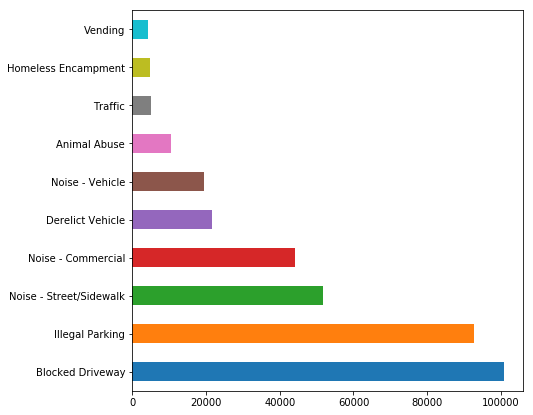

In [17]:
major_complaint.plot(kind='barh',figsize=(7,7))

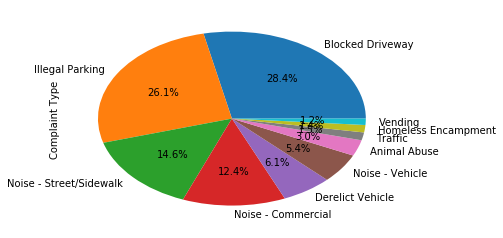

In [18]:
major_complaint.plot(kind='pie',autopct='%1.1f%%')

In [19]:
#Display the complaint type and city together
data.groupby(['Complaint Type','City']).size().reset_index()

,Complaint Type,City,0
0,Animal Abuse,ARVERNE,46
1,Animal Abuse,ASTORIA,170
2,Animal Abuse,BAYSIDE,53
3,Animal Abuse,BELLEROSE,15
4,Animal Abuse,BREEZY POINT,2
5,Animal Abuse,BRONX,1971
6,Animal Abuse,BROOKLYN,3191
7,Animal Abuse,CAMBRIA HEIGHTS,15
8,Animal Abuse,COLLEGE POINT,35
9,Animal Abuse,CORONA,104


In [20]:
data.groupby(['City','Complaint Type','Descriptor']).size().reset_index()

,City,Complaint Type,Descriptor,0
0,ARVERNE,Animal Abuse,Chained,3
1,ARVERNE,Animal Abuse,Neglected,17
2,ARVERNE,Animal Abuse,No Shelter,1
3,ARVERNE,Animal Abuse,Other (complaint details),14
4,ARVERNE,Animal Abuse,Tortured,11
5,ARVERNE,Blocked Driveway,No Access,36
6,ARVERNE,Blocked Driveway,Partial Access,14
7,ARVERNE,Derelict Vehicle,With License Plate,32
8,ARVERNE,Disorderly Youth,Playing in Unsuitable Place,2
9,ARVERNE,Drinking,Underage - Licensed Est,1


In [21]:
Borough=data.groupby(['Borough']).size()
Borough

Borough
BRONX             49169
BROOKLYN         118864
MANHATTAN         77462
QUEENS           100766
STATEN ISLAND     15339
Unspecified        2958
dtype: int64

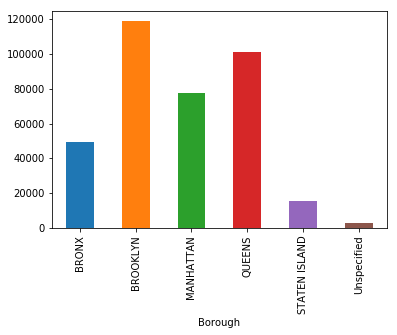

In [22]:
Borough.plot(kind='bar')

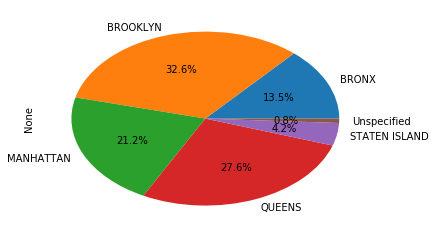

In [23]:
Borough.plot(kind='pie',autopct='%1.1f%%')

In [24]:
data[data['Complaint Type']=="Noise - Vehicle"]['Borough'].value_counts()

MANHATTAN        6295
BROOKLYN         5966
BRONX            3556
QUEENS           3053
STATEN ISLAND     424
Unspecified        58
Name: Borough, dtype: int64